# Tutorial 21: Constraints on Return and Risk Measures

## 1. Downloading the data:

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%%**********************]  25 of 25 completed


In [4]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.0257%,0.4057%,0.4035%,1.9692%,0.0180%,0.9305%,0.3678%,0.5783%,0.9483%,-1.1954%,...,1.5881%,0.0212%,2.8236%,0.9758%,0.6987%,1.7539%,-0.1730%,0.2409%,1.3735%,-1.0858%
2016-01-06,-11.4864%,-1.5879%,0.2412%,-1.7556%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-3.5867%,-0.9551%,...,0.5548%,0.0212%,0.1592%,-1.5646%,0.3108%,-1.0156%,-0.7653%,-3.0048%,-0.9034%,-2.9144%
2016-01-07,-5.1389%,-4.1922%,-1.6573%,-2.7699%,-1.1047%,-1.9769%,-1.2206%,-0.8855%,-4.6059%,-2.5394%,...,-2.2067%,-3.0309%,-1.0411%,-3.1557%,-1.6148%,-0.2699%,-2.2845%,-2.0570%,-0.5492%,-3.0019%
2016-01-08,0.2736%,-2.2705%,-1.6037%,-2.5425%,0.1099%,-0.2241%,0.5707%,-1.6402%,-1.7642%,-0.1649%,...,-0.1538%,-1.1366%,-0.7307%,-0.1448%,0.0895%,-3.3839%,-0.1117%,-1.1387%,-0.9720%,-1.1254%
2016-01-11,-4.3383%,0.1692%,-1.6851%,-1.0215%,0.0915%,-1.1791%,0.5674%,0.5287%,0.6616%,0.0330%,...,1.6436%,0.0000%,0.9869%,-0.1450%,1.2224%,1.4570%,0.5367%,-0.4607%,0.5800%,-1.9919%


## 2. Estimating Mean Variance Portfolios

### 2.1 Calculating the portfolio that maximizes Sharpe ratio.

In [5]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,6.1590%,11.5018%,0.0000%,0.0000%,8.4806%,0.0000%,3.8193%,0.0000%,0.0000%,...,10.8264%,0.0000%,0.0000%,0.0000%,0.0000%,7.1804%,0.0000%,0.0000%,4.2740%,0.0000%


### 2.2 Plotting portfolio composition

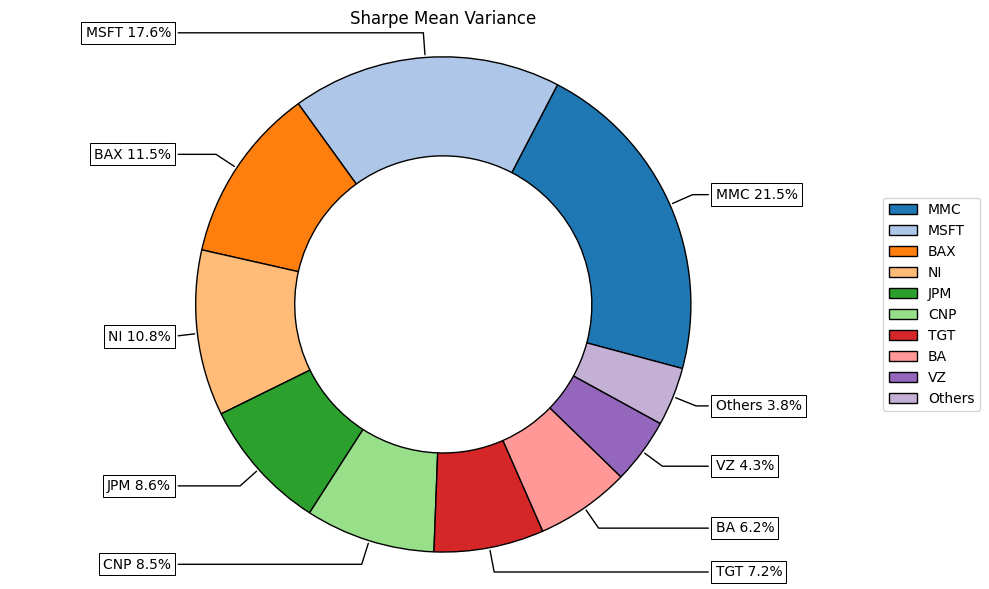

In [6]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 2.3 Calculate Efficient Frontier

In [7]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0000%,0.0000%,5.2376%,4.3880%,2.1296%,6.9905%,3.2270%,0.0741%,0.0000%,2.8447%,...,11.4530%,0.0000%,14.9247%,0.1681%,6.5902%,4.0899%,0.0000%,0.0000%,8.2767%,0.0000%
1,0.0000%,2.0125%,8.4902%,0.7981%,1.6844%,8.5599%,2.1529%,1.3613%,0.0000%,1.0444%,...,13.4497%,0.0000%,9.2100%,0.0000%,5.5815%,5.5235%,0.0000%,0.0000%,8.7591%,0.0000%
2,0.0000%,2.8165%,9.3710%,0.0000%,1.1980%,9.1476%,1.7065%,1.7396%,0.0000%,0.0872%,...,14.2328%,0.0000%,6.4848%,0.0000%,5.1002%,6.0539%,0.0000%,0.0000%,9.0039%,0.0000%
3,0.0000%,3.4306%,9.9328%,0.0000%,0.5693%,9.5578%,1.0811%,1.9316%,0.0000%,0.0000%,...,14.7708%,0.0000%,3.6631%,0.0000%,4.2578%,6.4249%,0.0000%,0.0000%,9.2132%,0.0000%
4,0.0000%,3.9343%,10.3864%,0.0000%,0.0003%,9.8875%,0.3998%,2.0811%,0.0000%,0.0000%,...,15.1319%,0.0000%,1.0860%,0.0000%,3.3463%,6.7109%,0.0000%,0.0000%,9.2765%,0.0000%


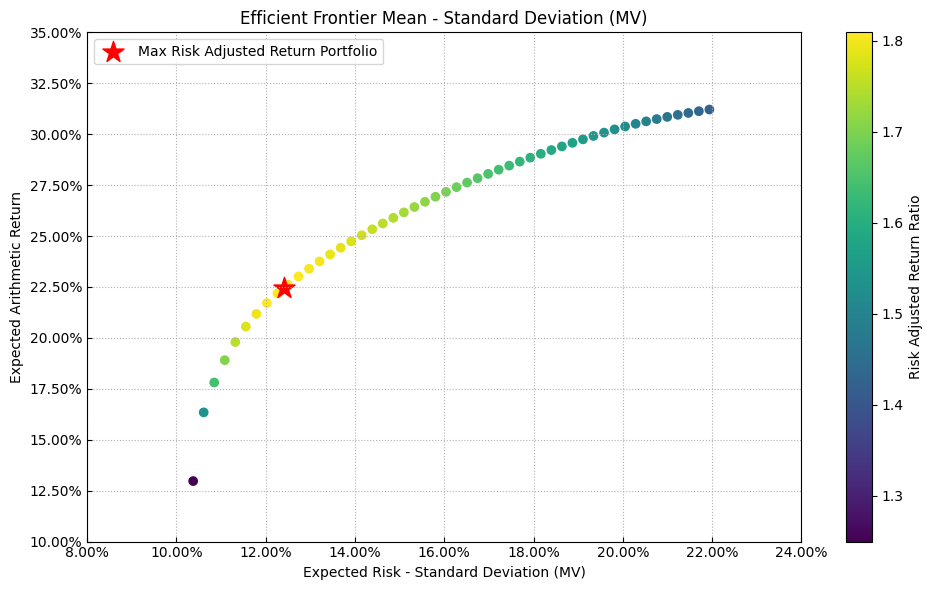

In [8]:
# Plotting the efficient frontier in Std. Dev. dimension

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

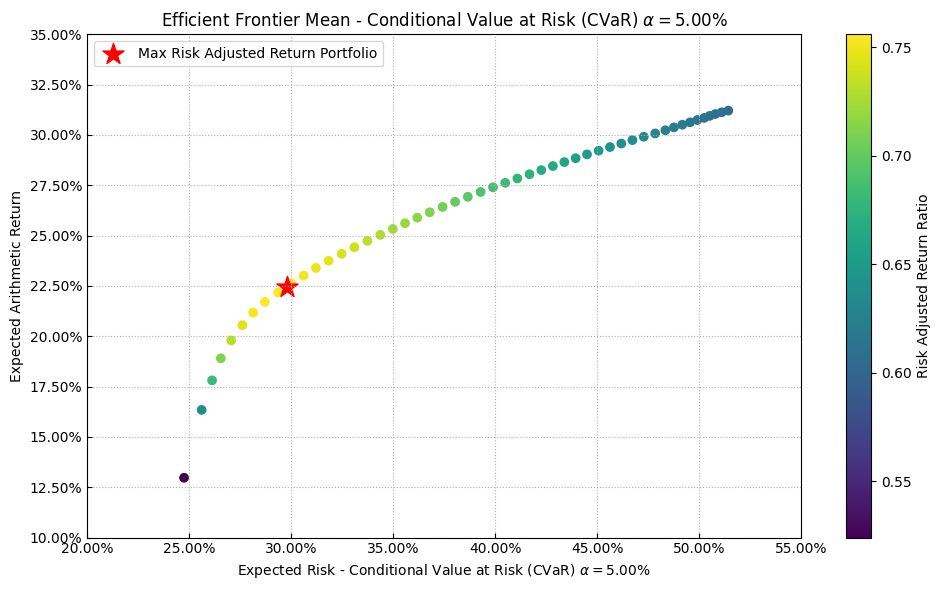

In [9]:
# Plotting the efficient frontier in CVaR dimension

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm='CVaR',
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

이 경우 평균-분산 최적화를 사용하여 만든 효율적 프론티어는 CVaR을 위험 측정으로 사용하여 플로팅할 때 유사한 형태를 보입니다.

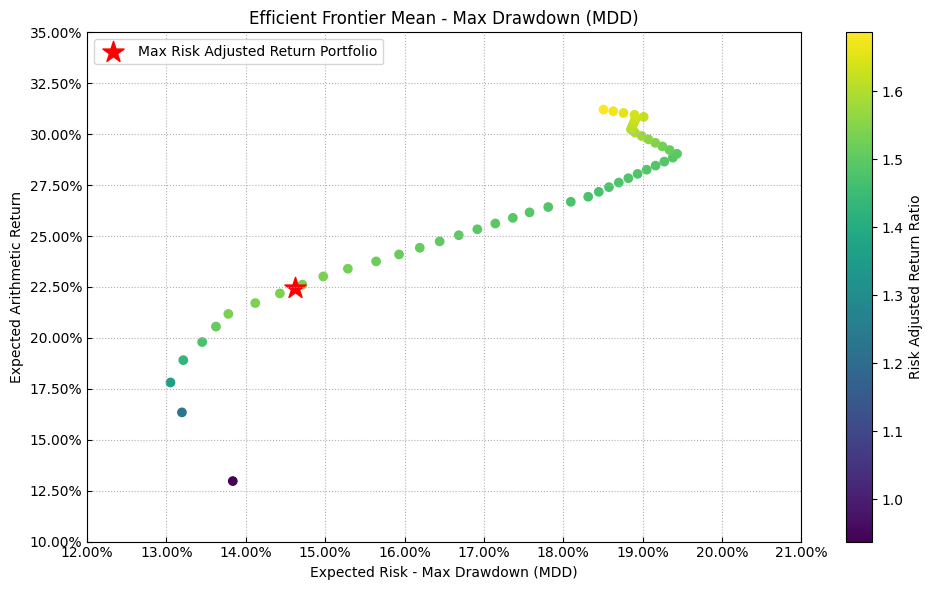

In [10]:
# Plotting the efficient frontier in Max Drawdown dimension

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm='MDD',
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

이 경우 평균-분산 최적화를 사용하여 만든 효율적 프론티어는 최대 낙폭을 위험 측정으로 사용하여 플로팅할 때 뱀처럼 보입니다.

## 3. Building Portfolios with Constraints on Return and Risk Measures

### 3.1 Estimating Risk Limits for the Available Set of Assets

이것이 첫 번째 단계입니다. 각 위험 측정에 대한 최소값과 최대값을 추정할 것입니다. 이 단계를 권장하는 이유는 대규모 문제에서는 전체 효율적 프론티어를 구축하는 것이 실용적이지 않기 때문입니다. 각 위험 측정에 대해 프론티어의 첫 번째와 마지막 지점을 찾는 것이 더 빠릅니다. 이러한 포트폴리오를 사용하여 사용 가능한 자산 집합으로 얻을 수 있는 각 위험 측정의 최저값과 최고값을 찾을 수 있습니다.

In [11]:
risk = ['MV', 'CVaR', 'MDD']
label = ['Std. Dev.', 'CVaR', 'Max Drawdown']
alpha = 0.05

for i in range(3):
    limits = port.frontier_limits(model=model, rm=risk[i], rf=rf, hist=hist)
    risk_min = rp.Sharpe_Risk(limits['w_min'], cov=cov, returns=returns, rm=risk[i], rf=rf, alpha=alpha)
    risk_max = rp.Sharpe_Risk(limits['w_max'], cov=cov, returns=returns, rm=risk[i], rf=rf, alpha=alpha)    

    if 'Drawdown' in label[i]:
        factor = 1    
    else:
        factor = 252**0.5

    print('\nMin Return ' + label[i] + ': ', (mu @ limits['w_min']).item() * 252)
    print('Max Return ' + label[i] + ': ',  (mu @ limits['w_max']).item() * 252)
    print('Min ' + label[i] + ': ', risk_min * factor)
    print('Max ' + label[i] + ': ', risk_max * factor)


Min Return Std. Dev.:  0.12970353485299516
Max Return Std. Dev.:  0.3121065489668065
Min Std. Dev.:  0.10376834307255114
Max Std. Dev.:  0.21939031601460493

Min Return CVaR:  0.1145875694693756
Max Return CVaR:  0.3121065495101311
Min CVaR:  0.23762667068709306
Max CVaR:  0.5141976150243982

Min Return Max Drawdown:  0.16948839090806267
Max Return Max Drawdown:  0.3121065496218482
Min Max Drawdown:  0.0859697336853551
Max Max Drawdown:  0.18506714999254203



### 변수 설명:
- `mu`: 자산의 예상 수익률 벡터.
- `limits['w_min']`: 효율적 프론티어에서 최소 위험 포트폴리오의 가중치 벡터.
- `limits['w_max']`: 효율적 프론티어에서 최대 위험 포트폴리오의 가중치 벡터.
- `factor`: 일별 위험 측정치를 연간화하는 데 사용되는 요인.

### 연간 수익률 계산:
자산의 예상 수익률 벡터 `mu`와 포트폴리오의 가중치 벡터 `limits['w_min']` 및 `limits['w_max']`를 사용하여 최소 및 최대 수익률을 계산합니다. 수익률은 일 단위로 주어지기 때문에 이를 연간화하기 위해 252를 곱합니다(보통 1년에 약 252일의 거래일이 있다고 가정).

```python
# 최소 가중치 포트폴리오의 연간 수익률 계산 및 출력
print('\nMin Return ' + label[i] + ': ', (mu @ limits['w_min']).item() * 252)
# 최대 가중치 포트폴리오의 연간 수익률 계산 및 출력
print('Max Return ' + label[i] + ': ', (mu @ limits['w_max']).item() * 252)
```

- `(mu @ limits['w_min'])`: 벡터 내적(dot product) 연산으로 포트폴리오의 예상 일간 수익률을 계산합니다.
- `.item()`: 결과를 스칼라 값으로 변환합니다.
- `* 252`: 일간 수익률을 연간 수익률로 변환합니다.

### 연간화 위험 계산:
위험 측정치가 최대 낙폭(Max Drawdown)이 아닌 경우, 일별 위험을 연간화하기 위해 `factor = 252**0.5`를 사용합니다. 최대 낙폭의 경우에는 연간화가 필요 없으므로 `factor = 1`입니다.

```python
# 최소 위험 계산 및 출력 (연간화)
print('Min ' + label[i] + ': ', risk_min * factor)
# 최대 위험 계산 및 출력 (연간화)
print('Max ' + label[i] + ': ', risk_max * factor)
```

- `risk_min`: 최소 가중치 포트폴리오의 위험.
- `risk_max`: 최대 가중치 포트폴리오의 위험.
- `* factor`: 위험을 연간화합니다.

### 예시:
위험 측정치가 표준편차인 경우, 코드가 어떻게 작동하는지 예를 들어보겠습니다:

1. `mu`는 예상 수익률 벡터로 `[0.05, 0.1, 0.15]`라고 가정합니다.
2. `limits['w_min']`는 `[0.2, 0.3, 0.5]`와 같은 가중치 벡터입니다.
3. `(mu @ limits['w_min'])`는 `0.05*0.2 + 0.1*0.3 + 0.15*0.5`로 계산됩니다.
4. 이 값은 일간 수익률이므로 `* 252`를 통해 연간 수익률로 변환됩니다.

이렇게 하면 최소 및 최대 가중치 포트폴리오의 연간 수익률과 위험을 출력할 수 있습니다.

위의 정보를 통해 알 수 있듯이, 목표 함수에서 표준편차를 위험 측정으로 사용하는 경우, 12.85%에서 31.17% 사이의 수익률과 10.37%에서 21.92% 사이의 표준편차만 얻을 수 있습니다. 다른 위험 측정에 대해서도 동일하게 적용됩니다. 이는 매우 유용한데, 만약 최대 CVaR을 23.75% 이하로 제한하는 제약을 두면 최적화 문제는 해를 가질 수 없기 때문입니다.

### 3.2 Calculating the portfolio that maximizes Sharpe ratio with constraints in Return, CVaR and Max Drawdown.

In [12]:
rm = 'MV' # Risk measure

# Constraint on minimum Return
port.lowerret = 0.16/252  # We transform annual return to daily return

# Constraint on maximum CVaR
port.upperCVaR = 0.26/252**0.5 # We transform annual CVaR to daily CVaR

# Constraint on maximum Max Drawdown
port.uppermdd = 0.131  # We don't need to transform drawdowns risk measures

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,2.1345%,8.1287%,0.0000%,0.0000%,12.0959%,0.0000%,2.2796%,0.0000%,0.4926%,...,10.6017%,0.0000%,6.2091%,0.0000%,0.2058%,8.9234%,0.0000%,0.0000%,13.0765%,0.0000%


이 코드는 포트폴리오 최적화를 수행하기 위해 설정된 제약 조건과 목표를 기반으로 포트폴리오 가중치를 최적화합니다. 여기서 사용된 주요 개념과 코드의 각 부분을 자세히 설명하겠습니다.

### 변수 및 설정
1. **위험 측정치 설정**:
   ```python
   rm = 'MV'  # Risk measure
   ```
   - 위험 측정치(risk measure)로 평균-분산(MV)을 설정합니다.

2. **최소 수익률 제약 조건 설정**:
   ```python
   port.lowerret = 0.16 / 252  # We transform annual return to daily return
   ```
   - 연간 최소 수익률을 일간 최소 수익률로 변환하여 설정합니다. 여기서 0.16은 연간 최소 수익률(16%)을 의미하며, 이를 일간 수익률로 변환하기 위해 252로 나눕니다.

3. **최대 CVaR 제약 조건 설정**:
   ```python
   port.upperCVaR = 0.26 / 252**0.5  # We transform annual CVaR to daily CVaR
   ```
   - 연간 CVaR(조건부 가치-at-위험) 값을 일간 CVaR로 변환하여 설정합니다. 여기서 0.26은 연간 CVaR(26%)을 의미하며, 이를 일간 CVaR로 변환하기 위해 `252**0.5`로 나눕니다.

4. **최대 최대 낙폭(Max Drawdown) 제약 조건 설정**:
   ```python
   port.uppermdd = 0.131  # We don't need to transform drawdowns risk measures
   ```
   - 최대 낙폭 제약 조건을 설정합니다. 낙폭은 일간 값으로 설정되므로 변환이 필요 없습니다. 여기서 0.131은 최대 낙폭을 의미합니다.

### 포트폴리오 최적화
```python
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
```
- `port.optimization` 함수는 설정된 모델, 위험 측정치, 목표 함수, 무위험 이자율, 기타 매개변수를 사용하여 포트폴리오 최적화를 수행합니다.
- 최적화된 포트폴리오 가중치 벡터 `w`를 반환합니다.

### 최적화 결과 출력
```python
display(w.T)
```
- 최적화된 포트폴리오 가중치 벡터 `w`를 전치(transpose)하여 보기 좋게 출력합니다.

### 코드 설명:
1. **위험 측정치 설정**: 최적화에서 사용할 위험 측정치로 평균-분산(MV)을 설정합니다.
2. **제약 조건 설정**:
   - 최소 수익률 제약 조건을 설정합니다. 연간 최소 수익률 16%를 일간 수익률로 변환하여 `port.lowerret`에 설정합니다.
   - 최대 CVaR 제약 조건을 설정합니다. 연간 CVaR 26%를 일간 CVaR로 변환하여 `port.upperCVaR`에 설정합니다.
   - 최대 낙폭 제약 조건을 설정합니다. 최대 낙폭 13.1%를 `port.uppermdd`에 설정합니다.
3. **포트폴리오 최적화 수행**: 설정된 모델, 위험 측정치, 목표 함수, 무위험 이자율 등을 기반으로 포트폴리오 최적화를 수행하고, 최적화된 포트폴리오 가중치를 `w`에 저장합니다.
4. **최적화 결과 출력**: 최적화된 포트폴리오 가중치를 보기 좋게 출력합니다.

이 코드를 통해 포트폴리오 최적화 문제를 해결할 수 있으며, 설정된 제약 조건을 만족하는 최적의 포트폴리오 가중치를 얻을 수 있습니다.

### 3.3 Plotting portfolio composition

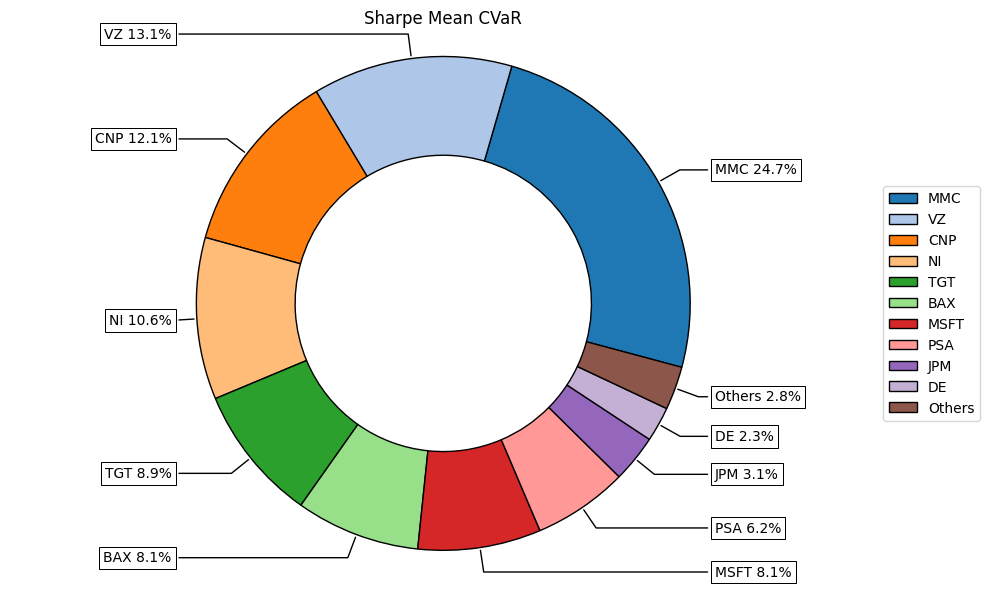

In [13]:
ax = rp.plot_pie(w=w, title='Sharpe Mean CVaR', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 3.4 Calculate Efficient Frontier

In [14]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0000%,1.8258%,8.1427%,1.1159%,1.8637%,8.5538%,2.2108%,1.3940%,0.0000%,1.1400%,...,13.2100%,0.0000%,9.8930%,0.0000%,5.4601%,5.2958%,0.0000%,0.0000%,9.0260%,0.0000%
1,0.0000%,1.8931%,8.2405%,0.9954%,1.8205%,8.5854%,2.1823%,1.4102%,0.0000%,1.0879%,...,13.2819%,0.0000%,9.6771%,0.0000%,5.4615%,5.3551%,0.0000%,0.0000%,8.9984%,0.0000%
2,0.0000%,1.9580%,8.3349%,0.8790%,1.7787%,8.6159%,2.1548%,1.4259%,0.0000%,1.0376%,...,13.3513%,0.0000%,9.4685%,0.0000%,5.4630%,5.4125%,0.0000%,0.0000%,8.9717%,0.0000%
3,0.0000%,2.0210%,8.4263%,0.7663%,1.7382%,8.6455%,2.1282%,1.4410%,0.0000%,0.9889%,...,13.4184%,0.0000%,9.2667%,0.0000%,5.4642%,5.4681%,0.0000%,0.0000%,8.9460%,0.0000%
4,0.0000%,2.0820%,8.5150%,0.6570%,1.6989%,8.6742%,2.1024%,1.4557%,0.0000%,0.9416%,...,13.4837%,0.0000%,9.0709%,0.0000%,5.4655%,5.5220%,0.0000%,0.0000%,8.9210%,0.0000%


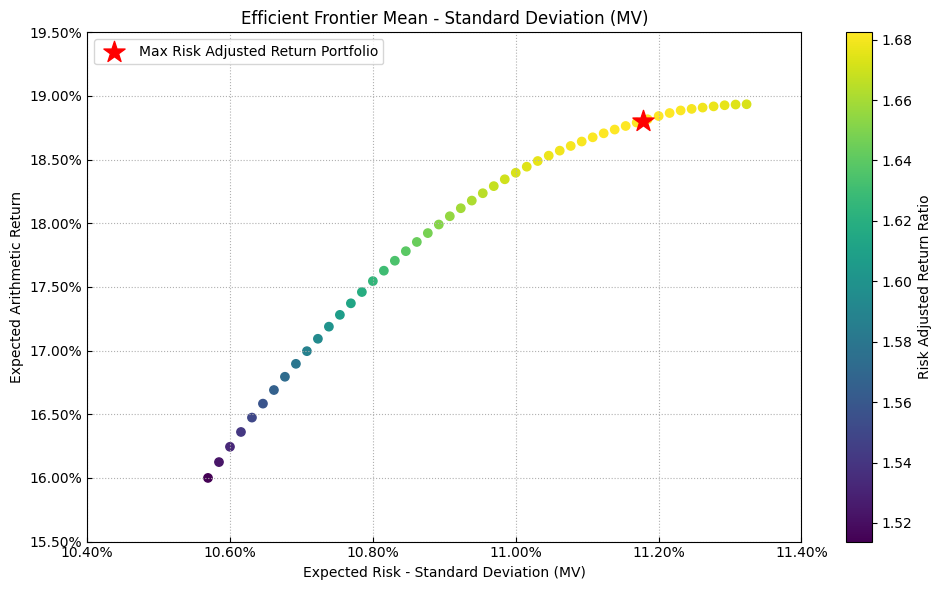

In [15]:
# Plotting the efficient frontier in Std. Dev. dimension

label = 'Max Risk Adjusted Return Portfolio' # Title of point

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

새로운 효율적 프론티어는 수익률의 하한선이 16%임을 확인할 수 있습니다.

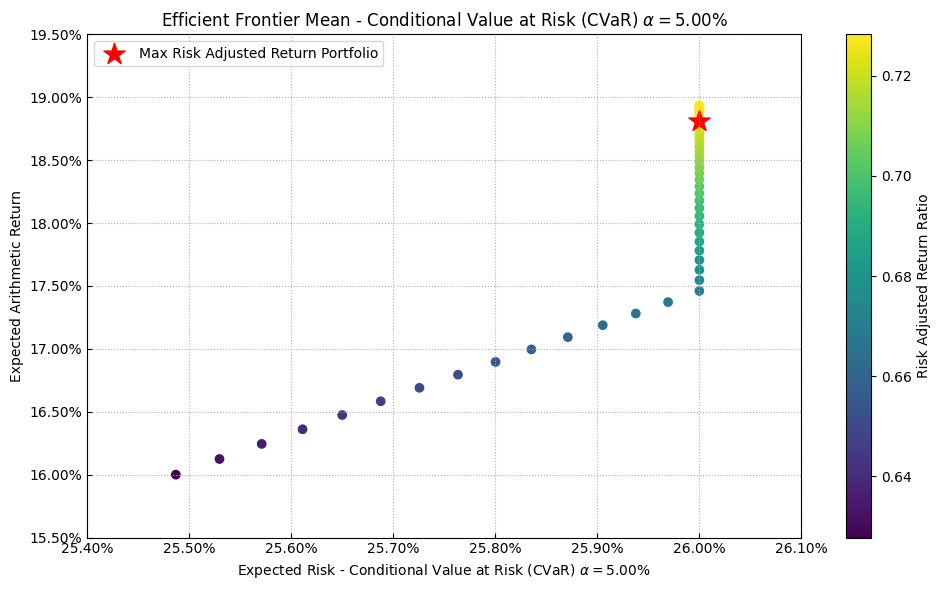

In [16]:
# Plotting the efficient frontier in CVaR dimension

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm='CVaR',
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

새로운 효율적 프론티어는 CVaR의 상한선이 26%임을 확인할 수 있습니다.

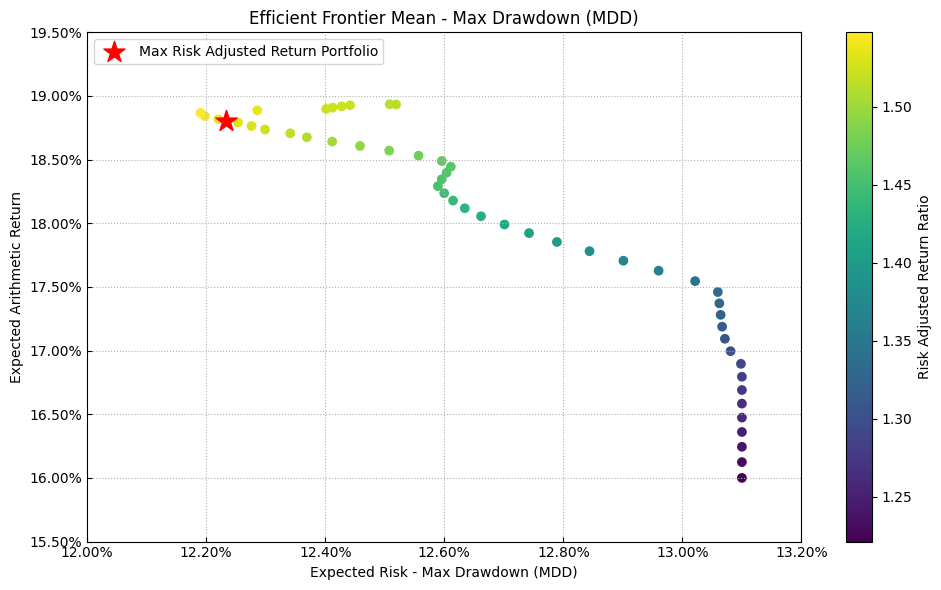

In [17]:
# Plotting the efficient frontier in Max Drawdown dimension

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm='MDD',
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

새로운 효율적 프론티어는 최대 낙폭(Max Drawdown)의 상한선이 13.1%임을 확인할 수 있습니다.